In [ ]:
import pandas
import tensorflow as tf
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [ ]:
#Install dependencies
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/MLMasters/kaggle.json' ~/.kaggle/
#Changing permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train = pandas.read_csv("/content/drive/My Drive/MLMasters/Titanic/train.csv")
test = pandas.read_csv("/content/drive/My Drive/MLMasters/Titanic/test.csv")
train.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Преобразование датасета**

In [ ]:
#Преобразуем датасет:
#удаление данных об именах, билете и кабине
train = train.drop(["Name","Ticket", "Cabin", "PassengerId"], axis = 1)
test = test.drop(["Name","Ticket", "Cabin", "PassengerId"], axis = 1)

In [ ]:
#Заполним в некоторых строках пропуски по параметру Age
train.Age.fillna(train.Age.mean(), inplace = True)
test.Age.fillna(test.Age.mean(), inplace = True)
# убедимся, что пропусков не осталось
train.Age.isna().sum()

0

In [ ]:
#Преобразуем данные о поле в число
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == "male" else 0)
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == "male" else 0)

In [ ]:
#Преобразуем данные о порте погрузки
train['Embarked'] = train['Embarked'].apply(lambda x: 1 if x == "S" else ( 2 if  x == "C" else 0))
test['Embarked'] = test['Embarked'].apply(lambda x: 1 if x == "S" else ( 2 if  x == "C" else 0))


In [ ]:
train.head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,1
1,1,1,0,38.000000,1,0,71.2833,2
2,1,3,0,26.000000,0,0,7.9250,1
3,1,1,0,35.000000,1,0,53.1000,1
4,0,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
95,0,3,1,29.699118,0,0,8.0500,1
96,0,1,1,71.000000,0,0,34.6542,2
97,1,1,1,23.000000,0,1,63.3583,2
98,1,2,0,34.000000,0,1,23.0000,1


In [ ]:
#Визуализация значимых признаков
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.119814
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.297414
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.016521
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.024979
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.028657
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.037832
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.263325
Embarked,0.119814,-0.297414,-0.016521,0.024979,-0.028657,0.037832,0.263325,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
test.Fare.fillna(test.Fare.mean(), inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


**Создание и обучение модели**

In [ ]:
y = train['Survived']
x = train.drop(columns='Survived')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Логистическая регрессия

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_predLR = logReg.predict(X_test)

scoreLR = logReg.score(X_test, y_test)
print(scoreLR)

0.8156424581005587


In [ ]:
#Метод k ближайших соседей

KNeighbors = KNeighborsClassifier(n_neighbors=1)
KNeighbors.fit(X_train, y_train)

y_predN = KNeighbors.predict(X_test)

scoreKNN = KNeighbors.score(X_test, y_test)
print(scoreKNN)

0.8268156424581006


In [ ]:
#SVM Метод опорных векторов

SVM = SVC(kernel='linear', class_weight='balanced')
SVM.fit(X_train, y_train)
y_predSVM = SVM.predict(X_test)

scoreSVM = SVM.score(X_test, y_test)
print(scoreSVM)

0.7932960893854749


In [ ]:
#Дерево решений

trDis=tree.DecisionTreeClassifier()
trDis.fit(X_train, y_train)
y_predTR=trDis.predict(X_test)

scoreTD=accuracy_score(y_test, y_predTR)
print(scoreTD)

0.8100558659217877


In [ ]:
#Случайный лес

randTree = RandomForestClassifier(n_estimators=10)
randTree.fit(X_train, y_train)
y_predRF = randTree.predict(X_test)

scoreRT=accuracy_score(y_test, y_predRF)
print(scoreRT)

0.8324022346368715


In [ ]:
#Наивный байесовский классификатор

naive_bayes = GaussianNB()

naive_bayes.fit(X_train , y_train)
y_predNB = naive_bayes.predict(X_test)

scoreNB = accuracy_score(y_test , y_predNB)
print(scoreNB)
naive_bayes.get_params()

0.8212290502793296


{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
# xgb
xgb_params = {'max_depth':[6, 8, 10], 'gamma':[0.1, 0.2], 'num_parallel_tree':[1,2,3]}
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_predX = xgb.predict(X_test)
scoreXGB = accuracy_score(y_test , y_predX)
print(scoreXGB)

0.8044692737430168


[Text(0, 0, 'Логистическая регрессия'),
 Text(1, 0, 'k ближайших соседей'),
 Text(2, 0, 'SVM Метод опорных векторов'),
 Text(3, 0, 'Дерево решений'),
 Text(4, 0, 'Случайный лес'),
 Text(5, 0, 'Наивный байесовский классификатор'),
 Text(6, 0, 'XGB')]

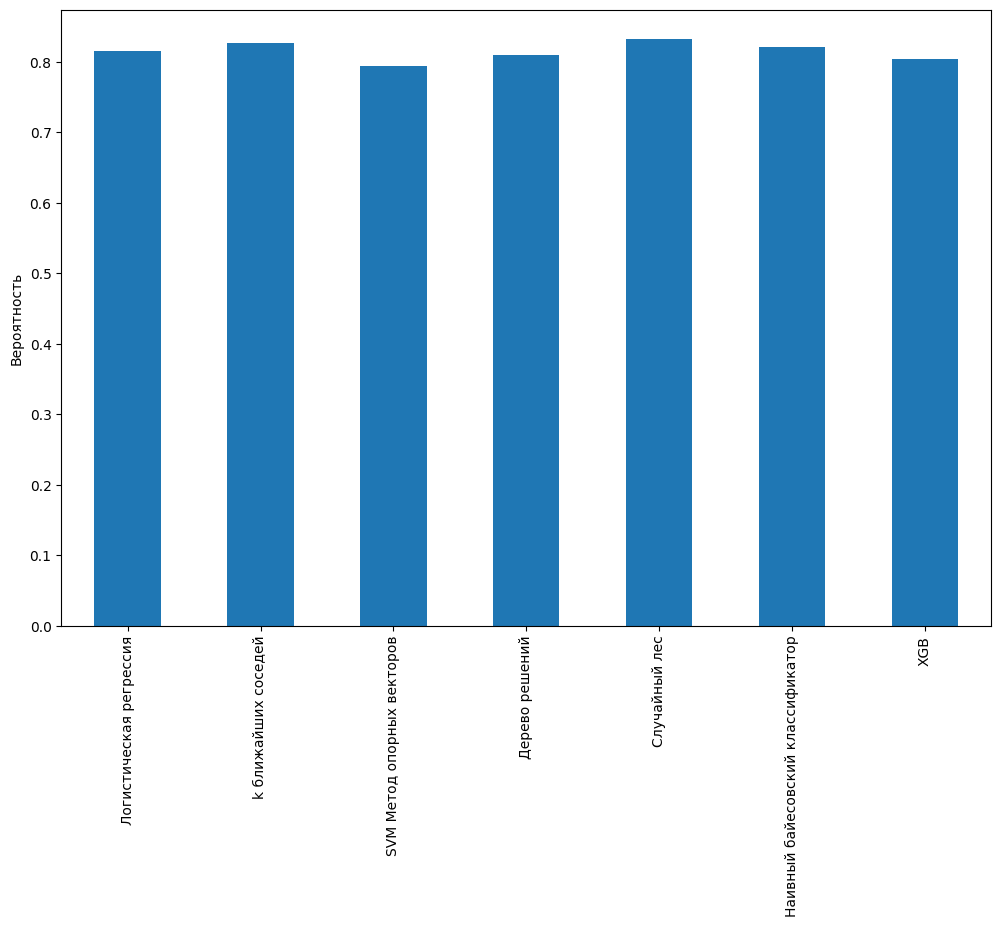

In [ ]:
frequencies = [scoreLR, scoreKNN, scoreSVM, scoreTD, scoreRT, scoreNB, scoreXGB]
freq_series = pandas.Series(frequencies)
x_labels = ['Логистическая регрессия', 'k ближайших соседей', 'SVM Метод опорных векторов', 'Дерево решений', 'Случайный лес', 'Наивный байесовский классификатор', 'XGB']
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_ylabel('Вероятность')
fig.set_xticklabels(x_labels)

Исходя из проведенного тестирования различных методов обучения, было решено выбрать случайный лес

**Создание решения**

In [ ]:
test = StandardScaler().fit_transform(test)

In [ ]:
randTreeRes = RandomForestClassifier(n_estimators=10)
train_y = train['Survived']
train_x = train.drop(columns='Survived')
randTreeRes.fit(train_x, train_y)
y_predRFRes = randTreeRes.predict(test)

In [ ]:
predictions = randTree.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
testDFconst = pandas.read_csv("/content/drive/My Drive/MLMasters/Titanic/test.csv")
#Создадим датасет с итоговым решением
result = pandas.DataFrame(testDFconst['PassengerId'])
result['Survived'] = y_predRFRes
result.to_csv("/content/drive/My Drive/MLMasters/Titanic/predictions.csv", index = False)

In [ ]:
!kaggle competitions submit -c Titanic -f predictions.csv -m "Ruchkin Daniil 9305 1"

100% 2.77k/2.77k [00:01<00:00, 2.57kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster